In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("/content/supermarket_sales - Sheet1.csv")

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [5]:
df.shape

(1000, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [8]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [9]:
# conclusion: No missing values in given dataset

By inspection, the 'Date' datatype is an object, we need to change it to datetime

In [10]:
df['date']=pd.to_datetime(df['Date'])

In [11]:
df['date'].dtype

dtype('<M8[ns]')

In [12]:
type(df['date'])

pandas.core.series.Series

In [13]:
df['date']=pd.to_datetime(df['date'])

In [14]:
df['day']=(df['date']).dt.day

In [15]:
df['month']=(df['date']).dt.month

In [16]:
df['year']=(df['date']).dt.year

In [17]:
df['Time']=pd.to_datetime(df['Time'])

In [18]:
df['Hour']=(df['Time']).dt.hour

In [19]:
# Let's see the unique hours of sales in this dataset

In [20]:
df['Hour'].nunique()

11

In [21]:
df['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12])

In [22]:
categorical_columns=[cname for cname in df.columns if df[cname].dtype== "object"]

In [23]:
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Date',
 'Payment']

In [24]:

a=df['Branch'].unique()
print(f"unique values in Branch:{a}")

unique values in Branch:['A' 'C' 'B']


In [25]:

a=df['City'].unique()
print(f"unique values in City:{a}")

unique values in City:['Yangon' 'Naypyitaw' 'Mandalay']


In [26]:

a=df['Customer type'].unique()
print(f"unique values in Customer type:{a}")

unique values in Customer type:['Member' 'Normal']


In [27]:

a=df['Gender'].unique()
print(f"unique values in Gender:{a}")

unique values in Gender:['Female' 'Male']


In [28]:

a=df['Product line'].unique()
print(f"unique values in Product line:{a}")

unique values in Product line:['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']


In [29]:

a=df['Date'].unique()
print(f"unique values in Date:{a}")

unique values in Date:['1/5/2019' '3/8/2019' '3/3/2019' '1/27/2019' '2/8/2019' '3/25/2019'
 '2/25/2019' '2/24/2019' '1/10/2019' '2/20/2019' '2/6/2019' '3/9/2019'
 '2/12/2019' '2/7/2019' '3/29/2019' '1/15/2019' '3/11/2019' '1/1/2019'
 '1/21/2019' '3/5/2019' '3/15/2019' '2/17/2019' '3/2/2019' '3/22/2019'
 '3/10/2019' '1/25/2019' '1/28/2019' '1/7/2019' '3/23/2019' '1/17/2019'
 '2/2/2019' '3/4/2019' '3/16/2019' '2/27/2019' '2/10/2019' '3/19/2019'
 '2/3/2019' '3/7/2019' '2/28/2019' '3/27/2019' '1/20/2019' '3/12/2019'
 '2/15/2019' '3/6/2019' '2/14/2019' '3/13/2019' '1/24/2019' '1/6/2019'
 '2/11/2019' '1/22/2019' '1/13/2019' '1/9/2019' '1/12/2019' '1/26/2019'
 '1/23/2019' '2/23/2019' '1/2/2019' '2/9/2019' '3/26/2019' '3/1/2019'
 '2/1/2019' '3/28/2019' '3/24/2019' '2/5/2019' '1/19/2019' '1/16/2019'
 '1/8/2019' '2/18/2019' '1/18/2019' '2/16/2019' '2/22/2019' '1/29/2019'
 '1/4/2019' '3/30/2019' '1/30/2019' '1/3/2019' '3/21/2019' '2/13/2019'
 '1/14/2019' '3/18/2019' '3/20/2019' '2/21/2019' '1/31/

In [30]:

a=df['Payment'].unique()
print(f"unique values in Payment:{a}")

unique values in Payment:['Ewallet' 'Cash' 'Credit card']


In [31]:
sns.set(style='darkgrid')

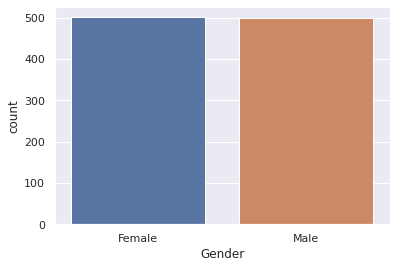

In [32]:
gender_count=sns.countplot(x="Gender",data=df)


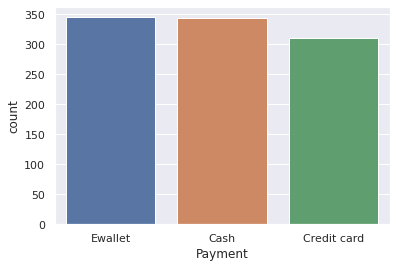

In [33]:
sns.countplot(x="Payment",data=df)

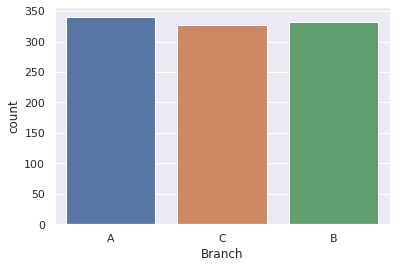

In [34]:
sns.countplot(x="Branch",data=df)

Text(0.5, 1.0, 'Rating by branch')

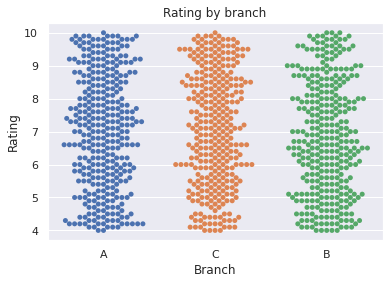

In [35]:
sns.swarmplot(x="Branch",y="Rating",data=df).set_title("Rating by branch")

Text(0.5, 1.0, 'Rating by branch')

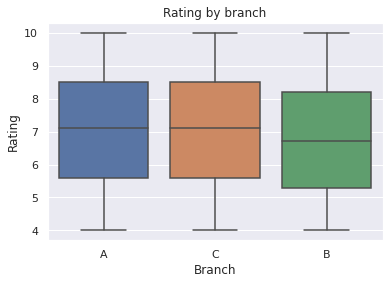

In [36]:
sns.boxplot(x="Branch",y="Rating",data=df).set_title("Rating by branch")

In [37]:
# Branch B has the lowest rating among all the branches

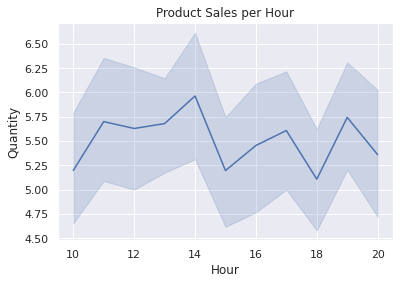

In [38]:
product_sales=sns.lineplot(x="Hour",y="Quantity",data=df).set_title("Product Sales per Hour")

In [39]:
# Sales by the hour in the comapny Most of the item were sold around 14:00 hrs local time

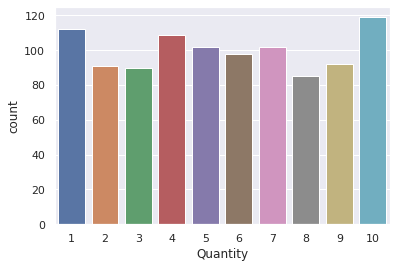

In [40]:
sns.countplot(x="Quantity",data=df)

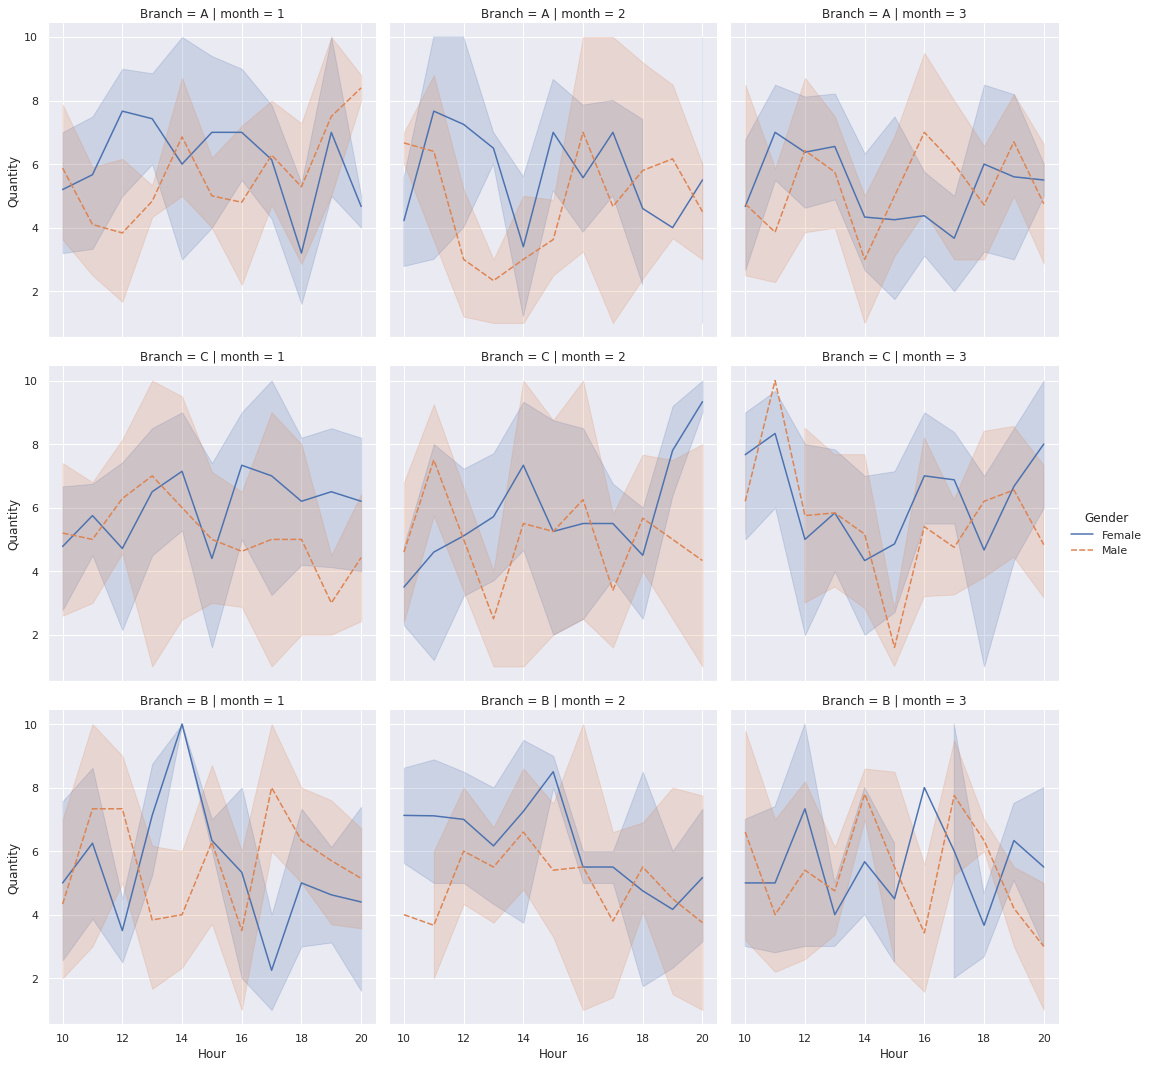

In [41]:
sns.relplot(x="Hour",y="Quantity",col="month",row="Branch",kind="line",hue="Gender",style="Gender",data=df)

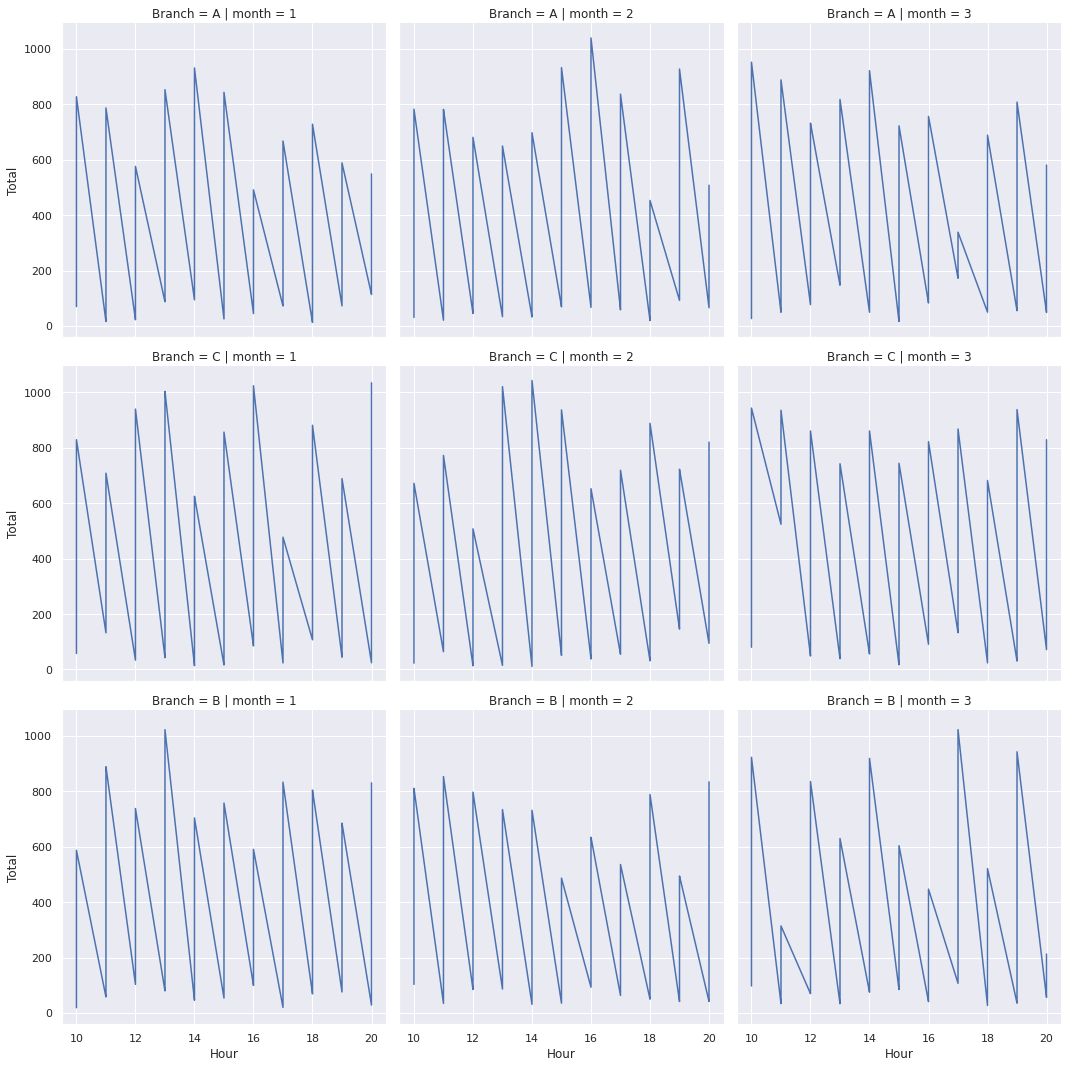

In [42]:
sns.relplot(x="Hour",y="Total",col="month",row="Branch",estimator=None,kind="line",data=df)

In [43]:
df['Rating'].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

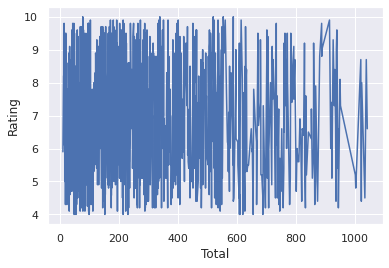

In [44]:
sns.lineplot(x="Total",y="Rating",data=df)

In [45]:
# Product Analysis

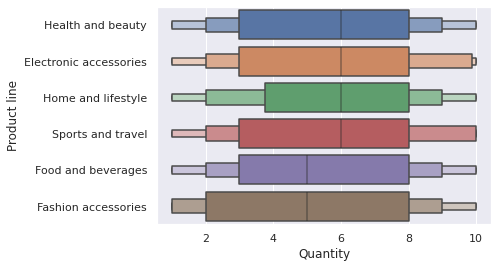

In [46]:
sns.boxenplot(x="Quantity",y="Product line",data=df)

In [47]:
# From the above visual, Health and Beauty,Electronic accessories, Homem and lifestyle, Sports and travel have a better average quantity sales that food and beverages as well as Fashion accessories.

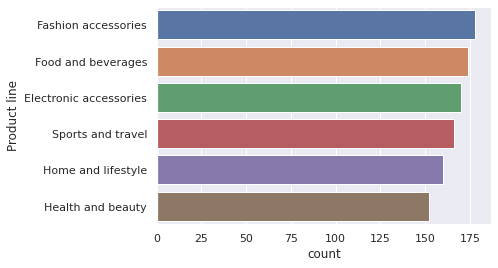

In [48]:
sns.countplot(y="Product line",data=df,order=df['Product line'].value_counts().index)

In [49]:
# From the above image shows the top product line item type sold in the given dataset. Fashion Accessories is the highest while Health and beauty is the lowest

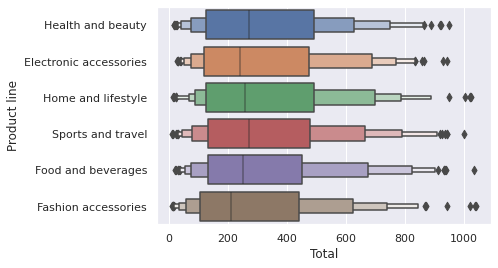

In [50]:
sns.boxenplot(y="Product line",x="Total",data=df)

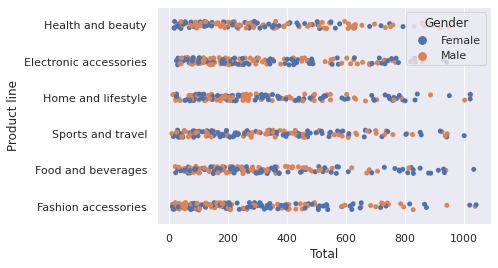

In [51]:
sns.stripplot(y="Product line",x="Total",hue='Gender',data=df)

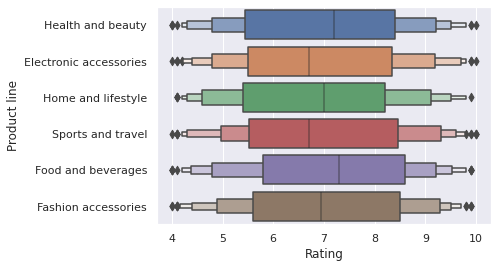

In [52]:
sns.boxenplot(y="Product line",x="Rating",data=df)

In [53]:
# Food and Beverages have the highest average rating while sports and travel the lowest

In [54]:
# Payment Channel

Text(0.5, 1.0, 'Payment Channel')

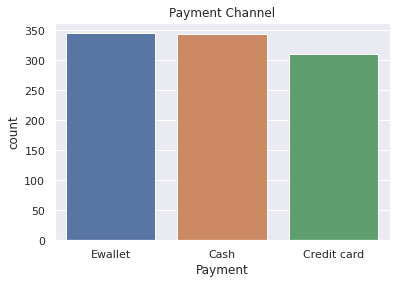

In [55]:
sns.countplot(x="Payment",data=df).set_title("Payment Channel")

In [56]:
# Most of the customers pay through the Ewallet and Cash Payment while under 40 percent of them pay with their credit card. We would also like to see this payment type distribution across all the branches

Text(0.5, 1.0, 'Payment Channel by Branch')

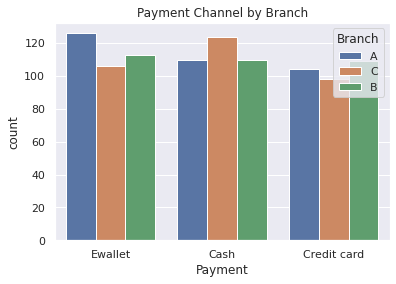

In [57]:
sns.countplot(x="Payment", hue = "Branch", data =df).set_title("Payment Channel by Branch") 

In [58]:
# Customer Analysis

In [59]:
df["Customer type"].nunique()

2

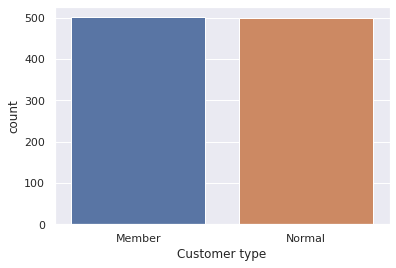

In [60]:
sns.countplot(x="Customer type",data=df)

In [61]:
df["Customer type"].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

Text(0.5, 1.0, 'Customer type by Branch')

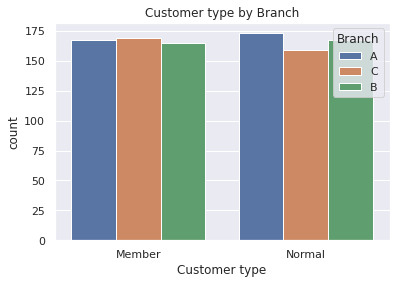

In [62]:
sns.countplot(x="Customer type",data=df,hue="Branch").set_title("Customer type by Branch")

In [63]:
df.groupby("Customer type")['Total'].sum()

Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64

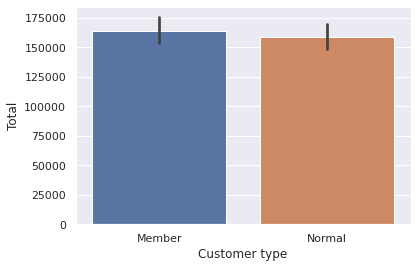

In [64]:
sns.barplot(x="Customer type",y="Total",estimator=sum,data=df)

Text(0.5, 1.0, 'Customer Type')

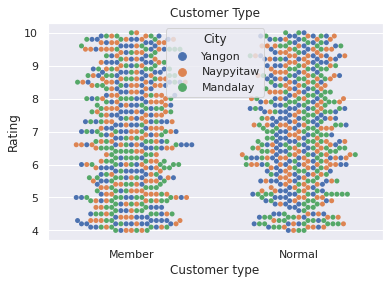

In [65]:
sns.swarmplot(x="Customer type",y="Rating",hue="City",data=df).set_title("Customer Type")

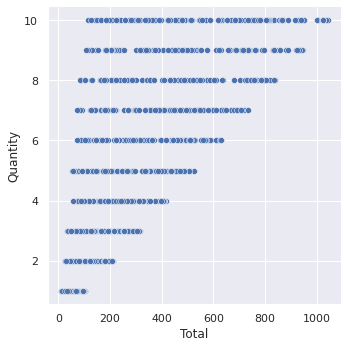

In [66]:
sns.relplot(x="Total",y="Quantity",data=df)

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
le=LabelEncoder()

In [69]:
for column in categorical_columns:
  df[column]=le.fit_transform(df[column])

In [70]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,date,day,month,year,Hour
0,814,0,2,0,0,3,74.69,7,26.1415,548.9715,...,2,522.83,4.761905,26.1415,9.1,2019-01-05,5,1,2019,13
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,...,0,76.40,4.761905,3.8200,9.6,2019-03-08,8,3,2019,10
2,653,0,2,1,1,4,46.33,7,16.2155,340.5255,...,1,324.31,4.761905,16.2155,7.4,2019-03-03,3,3,2019,13
3,18,0,2,0,1,3,58.22,8,23.2880,489.0480,...,2,465.76,4.761905,23.2880,8.4,2019-01-27,27,1,2019,20
4,339,0,2,1,1,5,86.31,7,30.2085,634.3785,...,2,604.17,4.761905,30.2085,5.3,2019-02-08,8,2,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,153,2,1,1,1,3,40.35,1,2.0175,42.3675,...,2,40.35,4.761905,2.0175,6.2,2019-01-29,29,1,2019,13
996,250,1,0,1,0,4,97.38,10,48.6900,1022.4900,...,2,973.80,4.761905,48.6900,4.4,2019-03-02,2,3,2019,17
997,767,0,2,0,1,2,31.84,1,1.5920,33.4320,...,0,31.84,4.761905,1.5920,7.7,2019-02-09,9,2,2019,13
998,308,0,2,1,1,4,65.82,1,3.2910,69.1110,...,0,65.82,4.761905,3.2910,4.1,2019-02-22,22,2,2019,15


Machine learning Models

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   int64         
 1   Branch                   1000 non-null   int64         
 2   City                     1000 non-null   int64         
 3   Customer type            1000 non-null   int64         
 4   Gender                   1000 non-null   int64         
 5   Product line             1000 non-null   int64         
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   int64         
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n